<a href="https://colab.research.google.com/github/dsanmartin/ELE050-B/blob/main/05_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, classification_report
import matplotlib.pyplot as plt

In [4]:
data_diabetes = load_diabetes(as_frame=True)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data_diabetes.data, data_diabetes.target, test_size=0.2, random_state=42)

In [14]:
layers = [100, 100]

In [22]:
mlp = MLPRegressor(hidden_layer_sizes=layers, activation='relu', solver='adam', max_iter=10000, random_state=42)
mlp = mlp.fit(X_train, y_train)

In [24]:
mlp.score(X_train, y_train)

0.5544514563967888

In [23]:
mlp.score(X_test, y_test)

0.5062681496249005

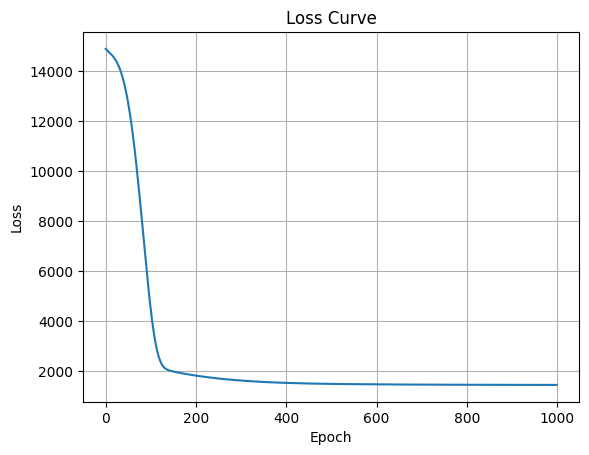

In [21]:
plt.plot(np.arange(len(mlp.loss_curve_)), mlp.loss_curve_)
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

## EXTRA: Problema de desvanecimiento de gradiente

In [32]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))
dsigmoid = lambda x: sigmoid(x) * (1 - sigmoid(x))
relu = lambda x: np.maximum(0, x)
drelu = lambda x: np.where(x > 0, 1, 0) # En realidad en 0 no existe la derivada, pero lo omitimos c:

In [29]:
x = np.linspace(-5, 5, 100)

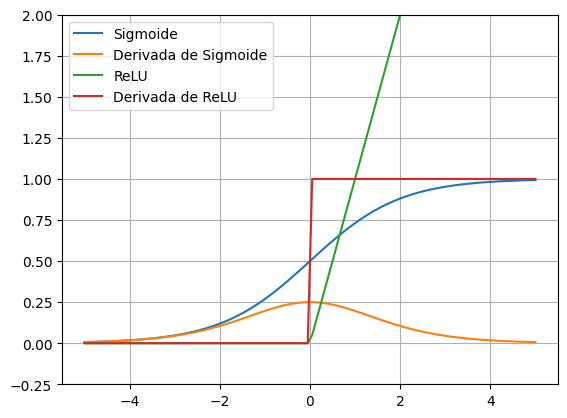

In [37]:
plt.plot(x, sigmoid(x), label='Sigmoide')
plt.plot(x, dsigmoid(x), label='Derivada de Sigmoide')
plt.plot(x, relu(x), label='ReLU')
plt.plot(x, drelu(x), label='Derivada de ReLU')
plt.legend()
plt.ylim(-0.25, 2)
plt.grid(True)
plt.show()